<a href="https://colab.research.google.com/github/choimando/sistHomework/blob/main/homework_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
forest_unlawfulness = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/산림청_산림 불법행위 단속현황_20211231.csv",encoding= 'CP949')
forest = forest_unlawfulness.copy()

In [6]:
forest

,년도,불법 산림형질변경(건),불법 산림형질변경(ha),무허가벌채(건),무허가벌채(ha),도벌(건),도벌(ha),기타(건),기타(ha)
0,2017,2640,493,1064,79,87,5,1879,1055
1,2018,2306,405,270,90,20,1,488,967
2,2019,2444,397,271,98,33,6,573,393
3,2020,2421,377,352,40,23,1,495,245
4,2021,2629,447,379,48,23,2,395,647


In [7]:
# 행, 열개수 출력
forest.shape

(5, 9)

In [8]:
#변수 속성
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   년도             5 non-null      int64
 1   불법 산림형질변경(건)   5 non-null      int64
 2   불법 산림형질변경(ha)  5 non-null      int64
 3   무허가벌채(건)       5 non-null      int64
 4   무허가벌채(ha)      5 non-null      int64
 5   도벌(건)          5 non-null      int64
 6   도벌(ha)         5 non-null      int64
 7   기타(건)          5 non-null      int64
 8   기타(ha)         5 non-null      int64
dtypes: int64(9)
memory usage: 488.0 bytes


In [9]:
#요약 통계량
forest.describe()

,년도,불법 산림형질변경(건),불법 산림형질변경(ha),무허가벌채(건),무허가벌채(ha),도벌(건),도벌(ha),기타(건),기타(ha)
count,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000
mean,2019.000000,2488.000000,423.800000,467.200000,71.00000,37.200000,3.000000,766.000000,661.400000
std,1.581139,143.643656,46.337889,337.121195,25.70992,28.270126,2.345208,625.376686,351.406887
min,2017.000000,2306.000000,377.000000,270.000000,40.00000,20.000000,1.000000,395.000000,245.000000
25%,2018.000000,2421.000000,397.000000,271.000000,48.00000,23.000000,1.000000,488.000000,393.000000
50%,2019.000000,2444.000000,405.000000,352.000000,79.00000,23.000000,2.000000,495.000000,647.000000
75%,2020.000000,2629.000000,447.000000,379.000000,90.00000,33.000000,5.000000,573.000000,967.000000
max,2021.000000,2640.000000,493.000000,1064.000000,98.00000,87.000000,6.000000,1879.000000,1055.000000


In [10]:
# 년도별 총합수와 평균 행 만들기
forest['합계(건)'] = (forest['불법 산림형질변경(건)']+forest['무허가벌채(건)']+forest['도벌(건)']+forest['기타(건)'])

In [11]:
forest

,년도,불법 산림형질변경(건),불법 산림형질변경(ha),무허가벌채(건),무허가벌채(ha),도벌(건),도벌(ha),기타(건),기타(ha),합계(건)
0,2017,2640,493,1064,79,87,5,1879,1055,5670
1,2018,2306,405,270,90,20,1,488,967,3084
2,2019,2444,397,271,98,33,6,573,393,3321
3,2020,2421,377,352,40,23,1,495,245,3291
4,2021,2629,447,379,48,23,2,395,647,3426


In [12]:
forest['합계(ha)'] = (forest['불법 산림형질변경(ha)']+forest['무허가벌채(ha)']+forest['도벌(ha)']+forest['기타(ha)'])

In [13]:
# 평균 행 만들기
forest['평균(건)'] = (forest['합계(건)']/4)

In [14]:
forest['평균(ha)']  = (forest['합계(ha)']/4)

In [15]:
forest

,년도,불법 산림형질변경(건),불법 산림형질변경(ha),무허가벌채(건),무허가벌채(ha),도벌(건),도벌(ha),기타(건),기타(ha),합계(건),합계(ha),평균(건),평균(ha)
0,2017,2640,493,1064,79,87,5,1879,1055,5670,1632,1417.50,408.00
1,2018,2306,405,270,90,20,1,488,967,3084,1463,771.00,365.75
2,2019,2444,397,271,98,33,6,573,393,3321,894,830.25,223.50
3,2020,2421,377,352,40,23,1,495,245,3291,663,822.75,165.75
4,2021,2629,447,379,48,23,2,395,647,3426,1144,856.50,286.00


In [16]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

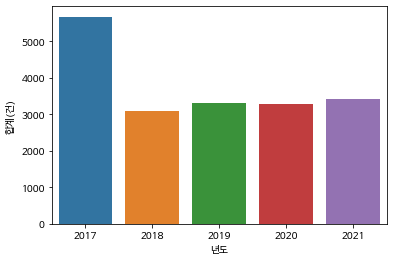

In [17]:
# 년도별 별(총건수) 막대 그래프 만들기

sns.barplot(data=forest, x='년도', y='합계(건)')

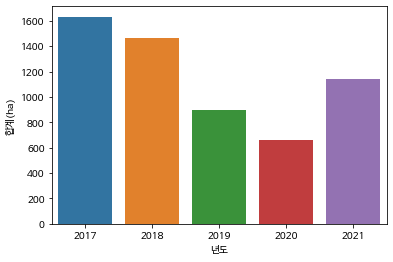

In [18]:
# 년도별 별(총ha) 막대 그래프 만들기
sns.barplot(data=forest, x='년도', y='합계(ha)')

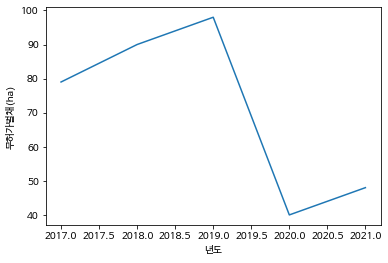

In [19]:
# 년도별 무허가 벌채(ha)
sns.lineplot(data = forest, x = '년도', y = '무허가벌채(ha)')

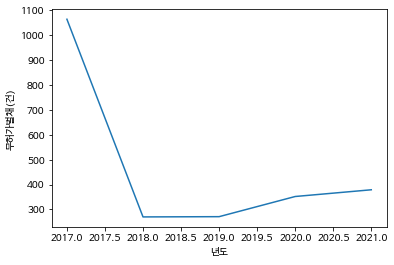

In [20]:
#년도별 무허가 벌채(건)
sns.lineplot(data = forest, x = '년도', y = '무허가벌채(건)')

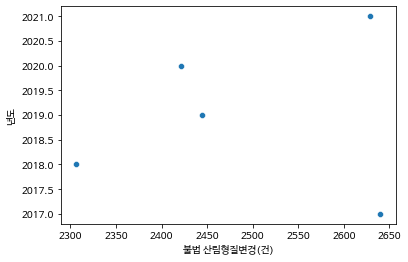

In [32]:
#불법 산림형질변경(건)
sns.scatterplot(data =forest, x='불법 산림형질변경(건)', y="년도")

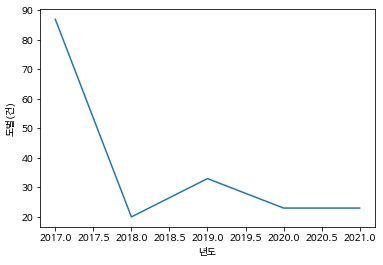

In [33]:
sns.lineplot(data=forest, x="년도", y="도벌(건)")